# Gépi tanulás féléves feladat - Dézsi Csaba István - bdigne
## Kezdjük az adatok elemzésével, illetve, ha szükséges, az adathalmaz tisztításával

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#DATA CLEANING
#getting rid of not needed columns
ignData = pd.read_csv("ign.csv")

ignData = ignData.drop('Unnamed: 0', axis=1)
ignData = ignData.drop('url', axis=1)
#ignData = ignData.drop('editors_choice', axis=1)
ignData = ignData.drop('title', axis=1)
ignData = ignData.drop('score_phrase', axis=1)

ignData


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,iPad,8.5,Puzzle,N,2012,9,12
3,Xbox 360,8.5,Sports,N,2012,9,11
4,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,N,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Xbox One,10.0,Adventure,Y,2016,6,28


>>> adattípusok(dtypes):  [dtype('O'), dtype('float64'), dtype('O'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
>>> hiányzó adatok százaléka:  [0.0, 0.0, 0.19328859060402684, 0.0, 0.0, 0.0, 0.0]


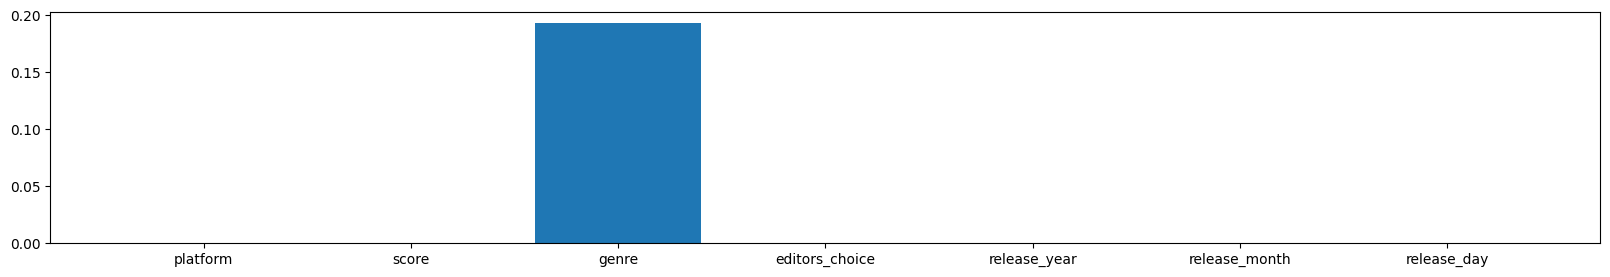

>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN
>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk:  ['genre']
>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:
	- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns
	- Tisztítást követő méret: 18589 rows × 8 columns


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,iPad,8.5,Puzzle,N,2012,9,12
3,Xbox 360,8.5,Sports,N,2012,9,11
4,PlayStation 3,8.5,Sports,N,2012,9,11
...,...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,N,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18622,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Xbox One,10.0,Adventure,Y,2016,6,28


In [3]:
#adat típusok és hiányzó adatok ellenőrzése, elemzése, esetleges kezelése

dtypes = list()
for dtype in ignData.dtypes:
    dtypes.append(dtype)

print('>>> adattípusok(dtypes): ', dtypes)
#------------------------------------------

ign_values_list = list()
cols_list = list()
for col in ignData.columns:
    pct_missing = np.mean(ignData[col].isnull())*100
    cols_list.append(col)
    ign_values_list.append(pct_missing)
print('>>> hiányzó adatok százaléka: ', ign_values_list)
#------------------------------------------


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = ign_values_list

plt.figure(figsize=(20, 3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()
print('>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN')
#------------------------------------------

less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.4) & (pct_missing_df.pct_missing > 0), 'col'].values)
ignData.dropna(subset=less_missing_values_cols_list, inplace=True)

print('>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk: ', less_missing_values_cols_list)

print('>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:')
print('\t- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns')
print('\t- Tisztítást követő méret: 18589 rows × 8 columns')
ignData

### Stringek int-é alakítása

In [4]:
#a biztonság kedvéért inkább copy-zok, nehogy elcsesszek valamit, mert akkor futtathatjuk úrja az elejétől
copiedData = ignData.copy()

#platform oszlop distinct elemeinek száma
platformCol = copiedData['platform']
platformNames = platformCol.drop_duplicates()
uniquePlatform = platformNames.count()

#genre distinct ertekei
genreCol = copiedData['genre']
genreNames = genreCol.drop_duplicates()
uniqueGenre = genreNames.count()

#editor's choice
editorsChoice = copiedData['editors_choice']
yesOrNo = editorsChoice.drop_duplicates()
uniqueChoice = yesOrNo.count()

print('num of unique platforms =',uniquePlatform, ', num of unique genres =',uniqueGenre)
platformIndexes = []
genreIndexes = []
choiceIndexes = []

i=0
for choice in editorsChoice:
    if (yesOrNo.values.__contains__(choice)):
        index, = np.where(yesOrNo.values == choice)
        choiceIndexes.append((index[0]+1)*10)
    i+=1

i=0
for platformName in platformCol:
    if (platformNames.values.__contains__(platformName)):
        index, = np.where(platformNames.values == platformName)
        platformIndexes.append(index[0]+1)
    i+=1

i=0
for genreName in genreCol:
    if (genreNames.values.__contains__(genreName)):
        index, = np.where(genreNames.values == genreName)
        genreIndexes.append(index[0]+1)
    i+=1


copiedData['platform'] = platformIndexes
copiedData['genre'] = genreIndexes
copiedData['editors_choice'] = choiceIndexes

print('Lehet látni, hogy szépen át lett minden string alakítva int-re')
copiedData

num of unique platforms = 59 , num of unique genres = 112
Lehet látni, hogy szépen át lett minden string alakítva int-re


,platform,score,genre,editors_choice,release_year,release_month,release_day
0,1,9.0,1,10,2012,9,12
1,1,9.0,1,10,2012,9,12
2,2,8.5,2,20,2012,9,12
3,3,8.5,3,20,2012,9,11
4,4,8.5,3,20,2012,9,11
...,...,...,...,...,...,...,...
18620,13,7.6,6,20,2016,6,29
18621,12,9.0,7,10,2016,6,29
18622,12,5.8,6,20,2016,6,28
18623,55,10.0,8,10,2016,6,28


## Most, hogy megvan az adattisztítás kezdjül el felépíteni a train és teszt adatainkat

In [5]:
from sklearn.model_selection import train_test_split
import torch

In [6]:
#első körben szétválasztjuk a be és kimeneti adatainkat, majd ezeket sétszedjük a megszokott módon train és teszt adathalmazokba
X, y = copiedData.drop('score', axis=1), copiedData['score']
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

y_train, y_test

(10088    9.4
 8118     6.0
 509      9.0
 2861     8.9
 17593    6.5
         ... 
 11293    8.6
 11977    4.0
 5394     8.9
 864      3.0
 15826    7.0
 Name: score, Length: 14871, dtype: float64,
 4684     9.5
 10267    6.7
 2365     8.4
 1431     7.8
 3302     8.3
         ... 
 17042    7.0
 14702    7.0
 10510    8.7
 11253    7.0
 4568     8.7
 Name: score, Length: 3718, dtype: float64)

In [7]:
X_train_raw

,platform,genre,editors_choice,release_year,release_month,release_day
10088,6,11,10,2007,11,5
8118,6,4,20,2006,6,13
509,16,5,10,1996,11,26
2861,24,5,10,2001,1,4
17593,4,9,20,2014,2,25
...,...,...,...,...,...,...
11293,11,3,10,2008,8,8
11977,42,11,20,2008,11,17
5394,6,3,20,2003,11,24
864,17,3,20,1998,6,17


In [8]:
X_test_raw.to_csv('X_test.csv')
X_test_raw

,platform,genre,editors_choice,release_year,release_month,release_day
4684,31,6,10,2003,3,17
10267,8,47,20,2007,12,5
2365,6,4,20,2000,7,21
1431,17,9,20,1999,7,27
3302,24,9,20,2001,9,24
...,...,...,...,...,...,...
17042,6,6,20,2013,5,7
14702,3,14,20,2010,5,25
10510,3,9,10,2008,2,4
11253,4,8,20,2008,8,5


## Kezdjük el a modellek definiálását és feltanítását
### 1.modell: Lineáris regressziós Neurális háló

Epoch 1, iteration 1:   1%|          | 10/1488 [00:00<00:05, 265.45batch/s, MAE=6.09]

Epoch 1, iteration 1: 100%|██████████| 1488/1488 [00:04<00:00, 343.34batch/s, MAE=0.0135]


MAE: 0.0135
RMAE: 0.1160


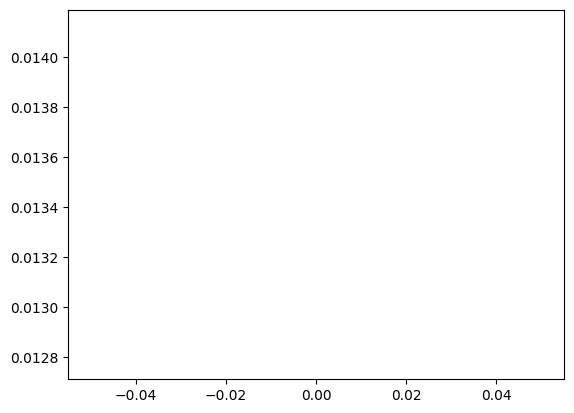

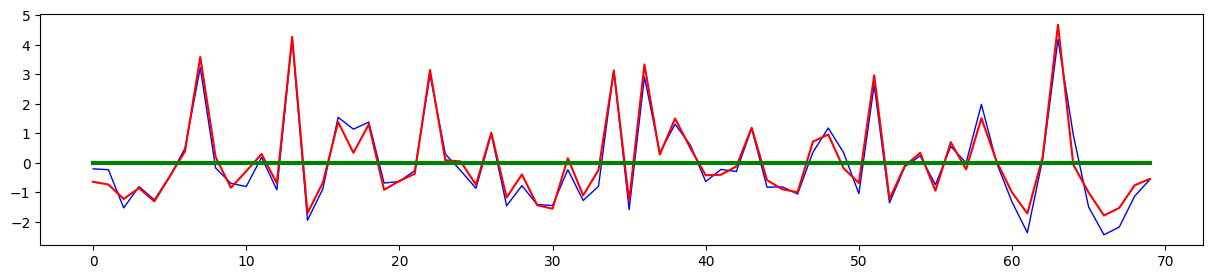

tensor done


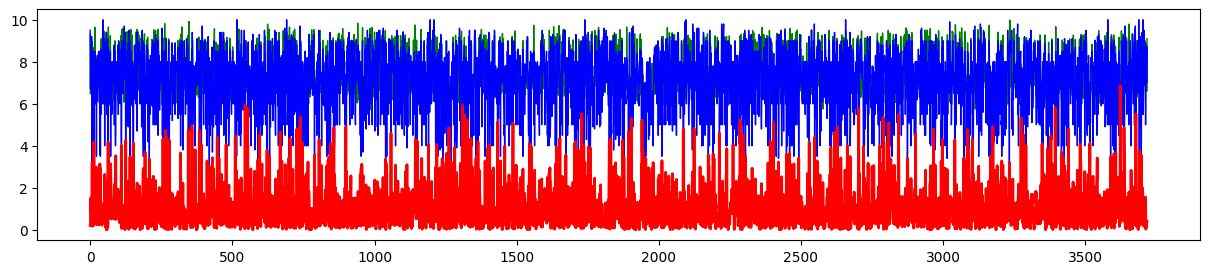

AVG absolute inference:1.087396449704142
MAX absolute inference:6.86
MIN absolute inference:0.0


In [9]:
from linreg import LinearRegressionNN
from logreg import LogisticRegressionNN

linreg = LinearRegressionNN()
#linreg = LogisticRegressionNN()
linreg.createLinRegModel()
linreg.trainNetwork(X_train_raw, y_train, X_test_raw, y_test, epochs = 100, batch_num=10, iteration=1)

linreg.plotTrainingHistory()
linreg.compareWithBestLinregModel(X_test_raw, y_test, sample_size=70)
linreg.evaluateModel(X_test_raw, y_test)

## Exportáljuk ki ONNX modellbe

In [10]:
linreg.export_to_ONNX_model()

============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
print('')
'''model.eval()
testResults = []
base=[]
res=[]
expecteds=[]

sample_size = 50

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(sample_size):
        X_sample = X_test_raw[i: i+1]
        X_sample = linreg.scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
                
        y_pred = linreg.model(X_sample)

        result = round(y_pred[0].numpy()[0]*1.0, 2)
        expected = round(y_test.to_numpy()[i]*1.0, 2)
        inference = round(result-expected, 2)

        expecteds.append(expected)
        res.append(result)
        testResults.append(inference)
        base.append(0)
testResults

fig, ax = plt.subplots()

x = np.linspace(0, sample_size-1, sample_size)
ax.fill_between(x, expecteds, res, alpha=.5, linewidth=0)
ax.plot(res, linewidth=2)
ax.plot(expecteds)

plt.show()'''

'model.eval()\ntestResults = []\nbase=[]\nres=[]\nexpecteds=[]\n\nsample_size = 50\n\nwith torch.no_grad():\n    # Test out inference with 5 samples\n    for i in range(sample_size):\n        X_sample = X_test_raw[i: i+1]\n        X_sample = linreg.scaler.transform(X_sample)\n        X_sample = torch.tensor(X_sample, dtype=torch.float32)\n                \n        y_pred = linreg.model(X_sample)\n\n        result = round(y_pred[0].numpy()[0]*1.0, 2)\n        expected = round(y_test.to_numpy()[i]*1.0, 2)\n        inference = round(result-expected, 2)\n\n        expecteds.append(expected)\n        res.append(result)\n        testResults.append(inference)\n        base.append(0)\ntestResults\n\nfig, ax = plt.subplots()\n\nx = np.linspace(0, sample_size-1, sample_size)\nax.fill_between(x, expecteds, res, alpha=.5, linewidth=0)\nax.plot(res, linewidth=2)\nax.plot(expecteds)\n\nplt.show()'